<a href="https://colab.research.google.com/github/rlrocha/paa/blob/main/ep3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático 3
Rafael Rocha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Definição dos tamanhos das entradas

Definição do tamanho das entradas n, variando de 50 a 100000 com passos de 500.

In [2]:
n_min = 50
n_max = 100000 # 100000, 5000
n_step = 500

n_list = np.arange(n_min, n_max+n_step, n_step, dtype=np.int64)
print('Entrada n: ', n_list)

Entrada n:  [    50    550   1050   1550   2050   2550   3050   3550   4050   4550
   5050   5550   6050   6550   7050   7550   8050   8550   9050   9550
  10050  10550  11050  11550  12050  12550  13050  13550  14050  14550
  15050  15550  16050  16550  17050  17550  18050  18550  19050  19550
  20050  20550  21050  21550  22050  22550  23050  23550  24050  24550
  25050  25550  26050  26550  27050  27550  28050  28550  29050  29550
  30050  30550  31050  31550  32050  32550  33050  33550  34050  34550
  35050  35550  36050  36550  37050  37550  38050  38550  39050  39550
  40050  40550  41050  41550  42050  42550  43050  43550  44050  44550
  45050  45550  46050  46550  47050  47550  48050  48550  49050  49550
  50050  50550  51050  51550  52050  52550  53050  53550  54050  54550
  55050  55550  56050  56550  57050  57550  58050  58550  59050  59550
  60050  60550  61050  61550  62050  62550  63050  63550  64050  64550
  65050  65550  66050  66550  67050  67550  68050  68550  69050  

## Definição das funções

### Funções para o algortimo Quick-Sort

In [3]:
def particao(A, p, r):
    
    global c_p
    
    x = A[r]
    i = p-1
    c_p+=2
    
    for j in range(p, r, 1):
        c_p+=1 # for
        if A[j] <= x:
            c_p+=1 # if
            
            i+=1
            temp = A[j]
            A[j] = A[i]
            A[i] = temp
            c_p+=4
    
    temp = A[r]
    A[r] = A[i+1]
    A[i+1] = temp
    c_p+=3
    
    c_p+=1
    return i+1

In [4]:
def rand_particao(A, p, r):
    
    global c_rp
    
    
    i = np.random.randint(p, r, 1)[0]
    c_rp+=1
    
    temp = A[i]
    A[i] = A[r]
    A[r] = temp
    c_rp+=3
    
    c_rp+=1
    return particao(A, p, r)

In [5]:
def quick_sort(A, p, r):
    
    global c_qs
    
    c_qs+=1
    if p<r:
        c_qs+=1
        q = rand_particao(A, p, r)
        c_qs+=1
        quick_sort(A, p, q-1)
        c_qs+=1
        quick_sort(A, q+1, r)

### Funções para o algortimo Radix-Sort

In [6]:
def counting_sort_radix(A, B, C, n, k, d):
    
    global c_csr
    
    for i in range(k):
        c_csr+=1
        C[i]=0
        c_csr+=1
        
    for j in range(n):
        c_csr+=1
        Aj = int(np.mod(np.floor(A[j]/d), 10)) 
        C[Aj] += 1
        c_csr+=2
    
    for i in range(1, k, 1):
        c_csr+=1
        C[i] = C[i] + C[i-1]
        c_csr+=1
    
    for j in range(n-1, -1, -1):
        c_csr+=1
        Aj = int(np.mod(np.floor(A[j]/d), 10)) 
        B[C[Aj]-1] = A[j]
        C[Aj] = C[Aj] - 1
        c_csr+=3
    
    c_csr+=1
    return B

In [7]:
def radix_sort(A, n):
    
    global c_rs
    
    maior = max(A)
    d = 1
    c_rs+=2
    
    while np.floor(maior/d) > 0:
        c_rs+=1
    
        k = int(np.max(np.mod(A/d, 10))+1)
        
        B = np.zeros(n, dtype=np.int32)
        C = np.ones(k, dtype=np.int32)
        c_rs+=3

        B = counting_sort_radix(A, B, C, n, k, d)
        c_rs+=1
        
        for i in range(n):
            c_rs+=1
            A[i] = B[i]
            c_rs+=1

        d = d*10
        c_rs+=1
    
    c_rs+=1
    return A

## Resultados
Analisando os resultados obtidos, nota-se que em termos de tempo de execução, o algortimo Quick-Sort é mais eficiente que o algoritmo Radix-Sort. Apesar disso, a quantidade de comandos executados pelo algoritmo Radix-Sort é ligeiramente menor que o algortimo Quick-Sort.

In [8]:
C_quick1 = []
C_radix1 = []
T_quick1 = []
T_radix1 = []

for n in n_list:
    A = np.random.randint(0, 100000, n)
    A_quick = A.copy()
    A_radix = A.copy()
    
    # Quick-Sort
    p = 0
    r = n-1 # Último elemento
    
    c_p = 0
    c_rp = 0
    c_qs = 0
    
    start_time = time.time()
    quick_sort(A_quick, p, r)
    t = time.time() - start_time # Tempo de execução
    
    C_quick1.append(c_p+c_rp+c_qs)
    T_quick1.append(t*1000)
    
    # Radix-Sort
    c_csr = 0
    c_rs = 0
    
    start_time = time.time()
    A_radix = radix_sort(A_radix, len(A_radix))
    t = time.time() - start_time # Tempo de execução
    
    C_radix1.append(c_csr+c_rs)
    T_radix1.append(t*1000)
    

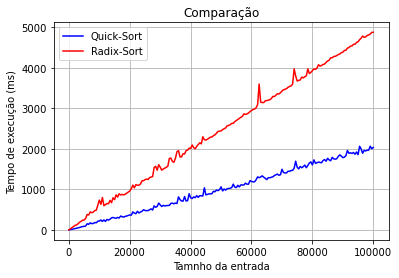

In [10]:
plt.plot(n_list, T_quick1, color='blue')
plt.plot(n_list, T_radix1, color='red')
plt.ylabel('Tempo de execução (ms)')
plt.xlabel('Tamnho da entrada')
plt.title('Comparação')
plt.legend(['Quick-Sort', 'Radix-Sort'])
plt.grid()
#plt.savefig('resultados/ep3/ep3_entrada_tempo1.png', dpi=300, bbox_inches = 'tight')
plt.show()

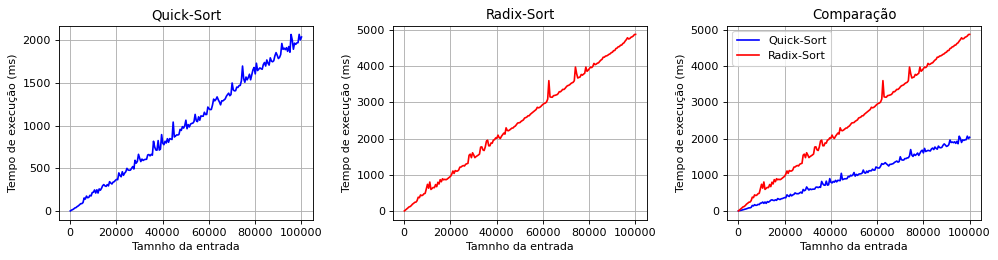

In [13]:
fig_luz, axes = plt.subplots(1,3,figsize=(8,3), dpi = 80)
plt.tight_layout()

axes[0].plot(n_list, T_quick1, color='blue')
axes[0].set_xlabel('Tamnho da entrada')
axes[0].set_ylabel('Tempo de execução (ms)')
axes[0].set_title('Quick-Sort')
axes[0].grid()

axes[1].plot(n_list, T_radix1, color='red')
axes[1].set_xlabel('Tamnho da entrada')
axes[1].set_ylabel('Tempo de execução (ms)')
axes[1].set_title('Radix-Sort')
axes[1].grid()

axes[2].plot(n_list, T_quick1, color='blue')
axes[2].plot(n_list, T_radix1, color='red')
axes[2].set_xlabel('Tamnho da entrada')
axes[2].set_ylabel('Tempo de execução (ms)')
axes[2].set_title('Comparação')
axes[2].grid()
axes[2].legend(['Quick-Sort', 'Radix-Sort'])

plt.subplots_adjust(right=1.5)

#plt.savefig('resultados/ep3/ep3_analise1_entrada_tempo.png', dpi=300, bbox_inches = 'tight')
plt.show()

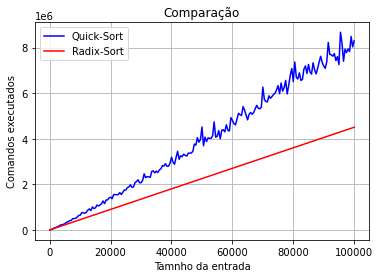

In [14]:
plt.plot(n_list, C_quick1, color='blue')
plt.plot(n_list, C_radix1, color='red')
plt.ylabel('Comandos executados')
plt.xlabel('Tamnho da entrada')
plt.title('Comparação')
plt.legend(['Quick-Sort', 'Radix-Sort'])
plt.grid()
#plt.savefig('resultados/ep3/ep3_analise1_entrada_comandos.png', dpi=300, bbox_inches = 'tight')
plt.show()

## Análise da complexidade dos Algoritmos

A complexidade do algortimo Quick-Sort é dada por:
\begin{equation*}
n*log(n)
\end{equation*}
Enquanto que a complexidade do algortimo Radix-Sort utilizando o Counting-Sort é definida por:
\begin{equation*}
d*(n+k)
\end{equation*}
Onde *n* é o tamanho do vetor, *k* é o maior valor inteiro dentro do vetor e *d* é a quantidade de dígitos.
Logo a complexidade, para um vetor de tamanho 1024, dos resultados obtidos acima em unidades de tempo, é:
\begin{equation*}
n*log(n)=1024*log(1024)=1024*10=10.240
\end{equation*}
e \begin{equation*}
d*(n+k)=6*(1024+100000) = 60.144
\end{equation*}
Desse modo, é possível provar que o algortimo Quick-Sort é mais eficiente em termos de tempo de execução. Esse resultado é obtido devido a geração de valores inteiros variando entre 0 e 100.000, onde o máximo valor que *k* pode assumir é 100.000 e por consequência, *d* assume 6.

In [15]:
n = 1024
k = 100000
d = 6

qs = n*np.log2(n)
rs = d*(n+k)

print('Quick-Sort: ', int(qs))
print('Radix-Sort: ', rs)

if qs<rs:
    print('\nQuick-Sort é o mais eficiente')
else:
    print('\nRadix-Sort é o mais eficiente')

Quick-Sort:  10240
Radix-Sort:  606144

Quick-Sort é o mais eficiente


Analisando a geração de valores inteiros variando, agora, entre 0 e 1.000, temos as seguintes complexidades em unidade de tempo:
\begin{equation*}
n*log(n)=1024*log(1024)=1024*10=10.240
\end{equation*}
e \begin{equation*}
d*(n+k)=4*(1024+1000) = 8.096
\end{equation*}
Com esse conjunto de parâmetros, por outro lado, nota-se o que algorimto Radix-Sort torna-se mais eficiente, devido as mudanças nos valores de *k* e *d*. Os resultados para essa nova análise encontram-se abaixo, e estes mostram o algortimo Radix-Sort é mais eficiente tanto em termos de tempo de execução, quanto em termos de quantidade de comandos executados.

In [16]:
n = 1024
k = 1000
d = 4

qs = n*np.log2(n)
rs = d*(n+k)

print('Quick-Sort: ', int(qs))
print('Radix-Sort: ', rs)

if qs<rs:
    print('\nQuick-Sort é o mais eficiente')
else:
    print('\nRadix-Sort é o mais eficiente')

Quick-Sort:  10240
Radix-Sort:  8096

Radix-Sort é o mais eficiente


In [17]:
C_quick2 = []
C_radix2 = []
T_quick2 = []
T_radix2 = []

for n in n_list:
    A = np.random.randint(0, 1000, n)
    A_quick = A.copy()
    A_radix = A.copy()
    
    # Quick-Sort
    p = 0
    r = n-1 # Último elemento
    
    c_p = 0
    c_rp = 0
    c_qs = 0
    
    start_time = time.time()
    quick_sort(A_quick, p, r)
    t = time.time() - start_time # Tempo de execução
    
    C_quick2.append(c_p+c_rp+c_qs)
    T_quick2.append(t*1000)
    
    # Radix-Sort
    c_csr = 0
    c_rs = 0
    
    start_time = time.time()
    A_radix = radix_sort(A_radix, len(A_radix))
    t = time.time() - start_time # Tempo de execução
    
    C_radix2.append(c_csr+c_rs)
    T_radix2.append(t*1000)

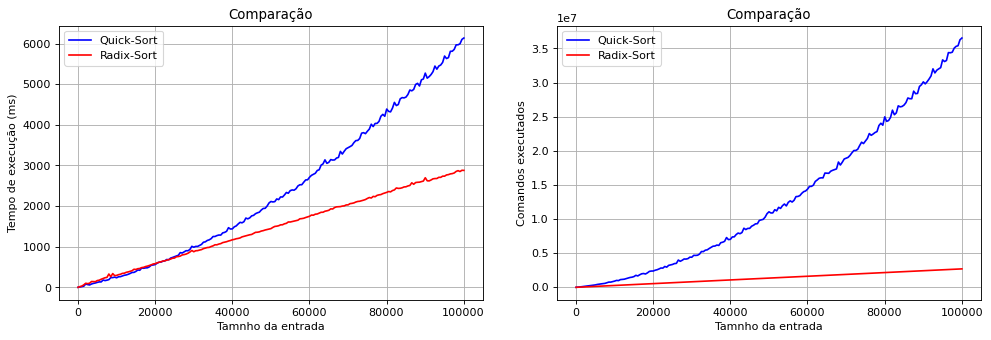

In [21]:
fig_luz, axes = plt.subplots(1,2,figsize=(8,4), dpi = 80)
plt.tight_layout()

axes[0].plot(n_list, T_quick2, color='blue')
axes[0].plot(n_list, T_radix2, color='red')
axes[0].set_xlabel('Tamnho da entrada')
axes[0].set_ylabel('Tempo de execução (ms)')
axes[0].set_title('Comparação')
axes[0].grid()
axes[0].legend(['Quick-Sort', 'Radix-Sort'])

axes[1].plot(n_list, C_quick2, color='blue')
axes[1].plot(n_list, C_radix2, color='red')
axes[1].set_xlabel('Tamnho da entrada')
axes[1].set_ylabel('Comandos executados')
axes[1].set_title('Comparação')
axes[1].grid()
axes[1].legend(['Quick-Sort', 'Radix-Sort'])

plt.subplots_adjust(right=1.5)

#plt.savefig('resultados/ep3/ep3_analise2_entrada_tempo_comandos.png', dpi=300, bbox_inches = 'tight')
plt.show()